Диабет - распространенное заболевание в США, вызывающее финансовые и здоровьесберегающие проблемы. Организм теряет способность регулировать уровень глюкозы в крови из-за недостатка инсулина или его неэффективного использования. Осложнения включают болезни сердца, потерю зрения, ампутацию и заболевания почек. Хотя нет лекарства, стратегии, такие как снижение веса и здоровое питание, могут помочь. Ранняя диагностика и эффективное лечение важны. Диабет распространен и влечет за собой значительные экономические издержки.

Система эпиднадзора за поведенческими факторами риска (BRFSS) - ежегодный опрос американцев о рискованных поведенческих факторах, хронических заболеваниях и профилактических услугах, проводимый Центром контроля заболеваний с 1984 года. Используется csv-набор данных с Kaggle за 2015 год, включающий ответы от 441 455 человек на 330 характеристик.

Могут ли вопросы опроса из BRFSS дать точные прогнозы о том, есть ли у человека диабет?

In [1]:
import numpy as np
import time
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import math
import warnings
from imblearn.combine import SMOTEENN
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler, LabelEncoder, label_binarize, KBinsDiscretizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, log_loss
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator, ClassifierMixin
from itertools import combinations
from sklearn.utils.validation import check_X_y, check_array

О колонках:

Diabetes_012: у вас диабет (0,1)

HighBP(Высокое артериальное давление)

HighChol(Высокий уровень холестерина)

CholCheck(проверка уровня холестерина в крови за последние пять лет)

Smoker(Выкурили ли вы хотя бы 100 сигарет за всю свою жизнь)

Stroke(Инсульт)

HeartDiseaseorAttack(Сердечные заболевания или приступы)

PhysActivity(Физическая активность)

Fruits(Фрукты)

Veggies(Овощи)

HvyAlcoholConsump(Общее потребление алкоголя)

AnyHealthcare(Медицинское страхование)

NoDocbcCost(Не обратились к врачу из-за цен)

GenHlth(Оценка уровня здоровья)

MentHlth(Количество дней, когда ваше психическое здоровье было плохим)

PhysHlth(Аналогично с физическим)

DiffWalk(Трудности при ходьбе)

Sex(Пол)

Age(Возраст)

Education(Обучение)

Income(Доход)


In [2]:
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("archive/diabetes.csv" , sep = "," , encoding = 'utf-8')
data.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [4]:
data.shape

(253680, 22)

In [5]:
numeric_count = data.select_dtypes(include=['int64', 'float64']).shape[1]

categorical_count = data.select_dtypes(include=['object']).shape[1]

print("Числовых типов данных:", numeric_count)
print("Категориальных типов данных:", categorical_count)

Числовых типов данных: 22
Категориальных типов данных: 0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [7]:
data.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [8]:
columns_to_convert = ["Diabetes_012", "HighBP", "HighChol", "CholCheck", "BMI", 
                      "Smoker", "Stroke", "HeartDiseaseorAttack", "PhysActivity", 
                      "Fruits", "Veggies", "HvyAlcoholConsump", "AnyHealthcare", 
                      "NoDocbcCost", "GenHlth", "MentHlth", "PhysHlth", "DiffWalk", 
                      "Sex", "Age", "Education", "Income"]

data[columns_to_convert] = data[columns_to_convert].astype(int)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_012          253680 non-null  int32
 1   HighBP                253680 non-null  int32
 2   HighChol              253680 non-null  int32
 3   CholCheck             253680 non-null  int32
 4   BMI                   253680 non-null  int32
 5   Smoker                253680 non-null  int32
 6   Stroke                253680 non-null  int32
 7   HeartDiseaseorAttack  253680 non-null  int32
 8   PhysActivity          253680 non-null  int32
 9   Fruits                253680 non-null  int32
 10  Veggies               253680 non-null  int32
 11  HvyAlcoholConsump     253680 non-null  int32
 12  AnyHealthcare         253680 non-null  int32
 13  NoDocbcCost           253680 non-null  int32
 14  GenHlth               253680 non-null  int32
 15  MentHlth              253680 non-n

In [9]:
data.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [10]:
unique_values = data.nunique()
unique_values_df = pd.DataFrame({'unique value count': unique_values})
unique_values_df

,unique value count
Diabetes_012,3
HighBP,2
HighChol,2
CholCheck,2
BMI,84
Smoker,2
Stroke,2
HeartDiseaseorAttack,2
PhysActivity,2
Fruits,2


In [11]:
data.drop_duplicates(inplace=True, keep=False)
data.duplicated().sum()

0

In [12]:
def v_counts(dataframe):
    for column_name, column_data in dataframe.items():
        print(f"Столбец: {column_name}")
        print(column_data.value_counts())
        print(f"Всего уникальных значений: {column_data.nunique()}")
        print("-----------------------------------------------------------------------------")

v_counts(data)


Столбец: Diabetes_012
Diabetes_012
0    179100
2     34867
1      4627
Name: count, dtype: int64
Всего уникальных значений: 3
-----------------------------------------------------------------------------
Столбец: HighBP
HighBP
0    117084
1    101510
Name: count, dtype: int64
Всего уникальных значений: 2
-----------------------------------------------------------------------------
Столбец: HighChol
HighChol
0    120640
1     97954
Name: count, dtype: int64
Всего уникальных значений: 2
-----------------------------------------------------------------------------
Столбец: CholCheck
CholCheck
1    209433
0      9161
Name: count, dtype: int64
Всего уникальных значений: 2
-----------------------------------------------------------------------------
Столбец: BMI
BMI
27    20096
26    16586
24    15314
28    14100
25    13773
      ...  
85        1
91        1
86        1
90        1
78        1
Name: count, Length: 84, dtype: int64
Всего уникальных значений: 84
-----------------------------

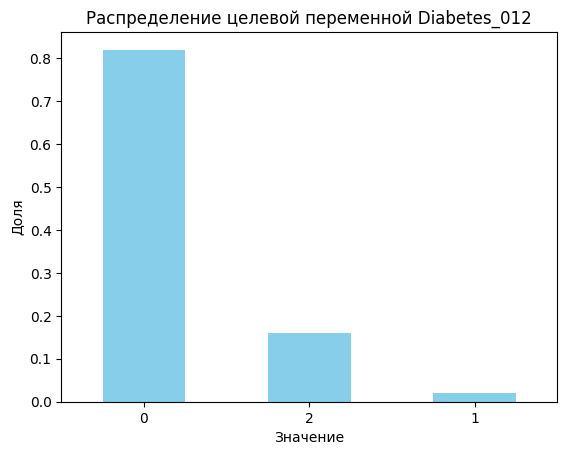

In [13]:
data['Diabetes_012'].value_counts(normalize=True).plot(kind='bar', color='skyblue')

plt.title("Распределение целевой переменной Diabetes_012")
plt.xlabel("Значение")
plt.ylabel("Доля")
plt.xticks(rotation=0)

plt.show()

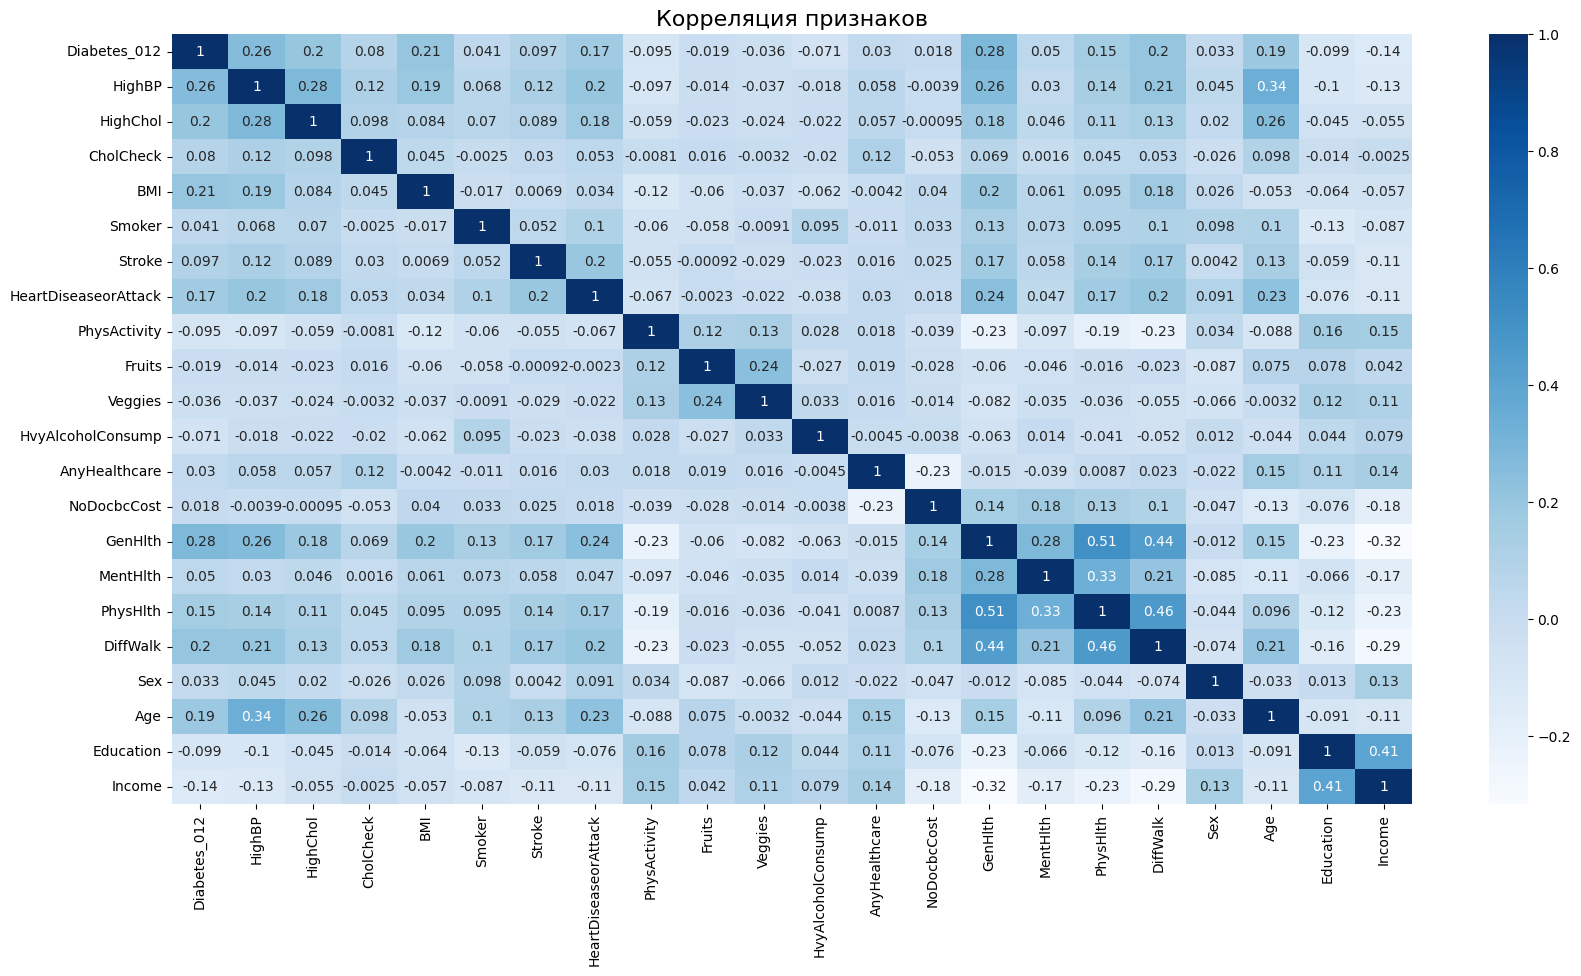

In [14]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(), annot=True, cmap='Blues')
plt.title("Корреляция признаков", fontsize=16)
plt.show()

(GenHlth, PhysHlth), (PhysHlth, Diff Walk), (GenHlth, Diff Walk) сильно коррелируют друг с другом => положительная связь

(GenHlth, Income), (Cliffwalk, Income) сильно коррелируют друг с другом => Отрицательная связь

In [15]:
df_vis=data.copy()
diabetes_map = {0: 'No Diabetes', 1: 'Pre Diabetes', 2: 'Diabetes'}
binary_map = {0: 'No', 1: 'Yes'}
disease_map = {0: 'No', 1: 'Yes'}
chol_map = {0: 'No High Cholesterol', 1: 'High Cholesterol'}
cholcheck_map = {0: 'No Cholesterol Check in 5 Years', 1: 'Cholesterol Check in 5 Years'}
health_map = {1: 'Excellent', 2: 'Very Good', 3: 'Good', 4: 'Fair', 5: 'Poor'}
education_map = {1: 'Never Attended School', 2: 'Elementary', 3: 'Some high school',
                 4: 'High school graduate', 5: 'Some college or technical school', 6: 'College graduate'}
income_map = {1: 'Less Than $10,000', 2: 'Less Than $10,000', 3: 'Less Than $10,000', 4: 'Less Than $10,000',
              5: 'Less Than $35,000', 6: 'Less Than $35,000', 7: 'Less Than $35,000', 8: '$75,000 or More'}

df_vis['Diabetes_012'] = df_vis['Diabetes_012'].map(diabetes_map)
df_vis['HighBP'] = df_vis['HighBP'].map({0: 'No High', 1: 'High BP'})
df_vis['HighChol'] = df_vis['HighChol'].map(chol_map)
df_vis['CholCheck'] = df_vis['CholCheck'].map(cholcheck_map)
df_vis['Smoker'] = df_vis['Smoker'].map(binary_map)
df_vis['Stroke'] = df_vis['Stroke'].map(binary_map)
df_vis['HeartDiseaseorAttack'] = df_vis['HeartDiseaseorAttack'].map(disease_map)
df_vis['PhysActivity'] = df_vis['PhysActivity'].map(binary_map)
df_vis['Fruits'] = df_vis['Fruits'].map(binary_map)
df_vis['Veggies'] = df_vis['Veggies'].map(binary_map)
df_vis['HvyAlcoholConsump'] = df_vis['HvyAlcoholConsump'].map(binary_map)
df_vis['AnyHealthcare'] = df_vis['AnyHealthcare'].map(binary_map)
df_vis['NoDocbcCost'] = df_vis['NoDocbcCost'].map(binary_map)
df_vis['GenHlth'] = df_vis['GenHlth'].map(health_map)
df_vis['DiffWalk'] = df_vis['DiffWalk'].map(binary_map)
df_vis['Sex'] = df_vis['Sex'].map({0: 'Female', 1: 'Male'})
df_vis['Education'] = df_vis['Education'].map(education_map)
df_vis['Income'] = df_vis['Income'].map(income_map)

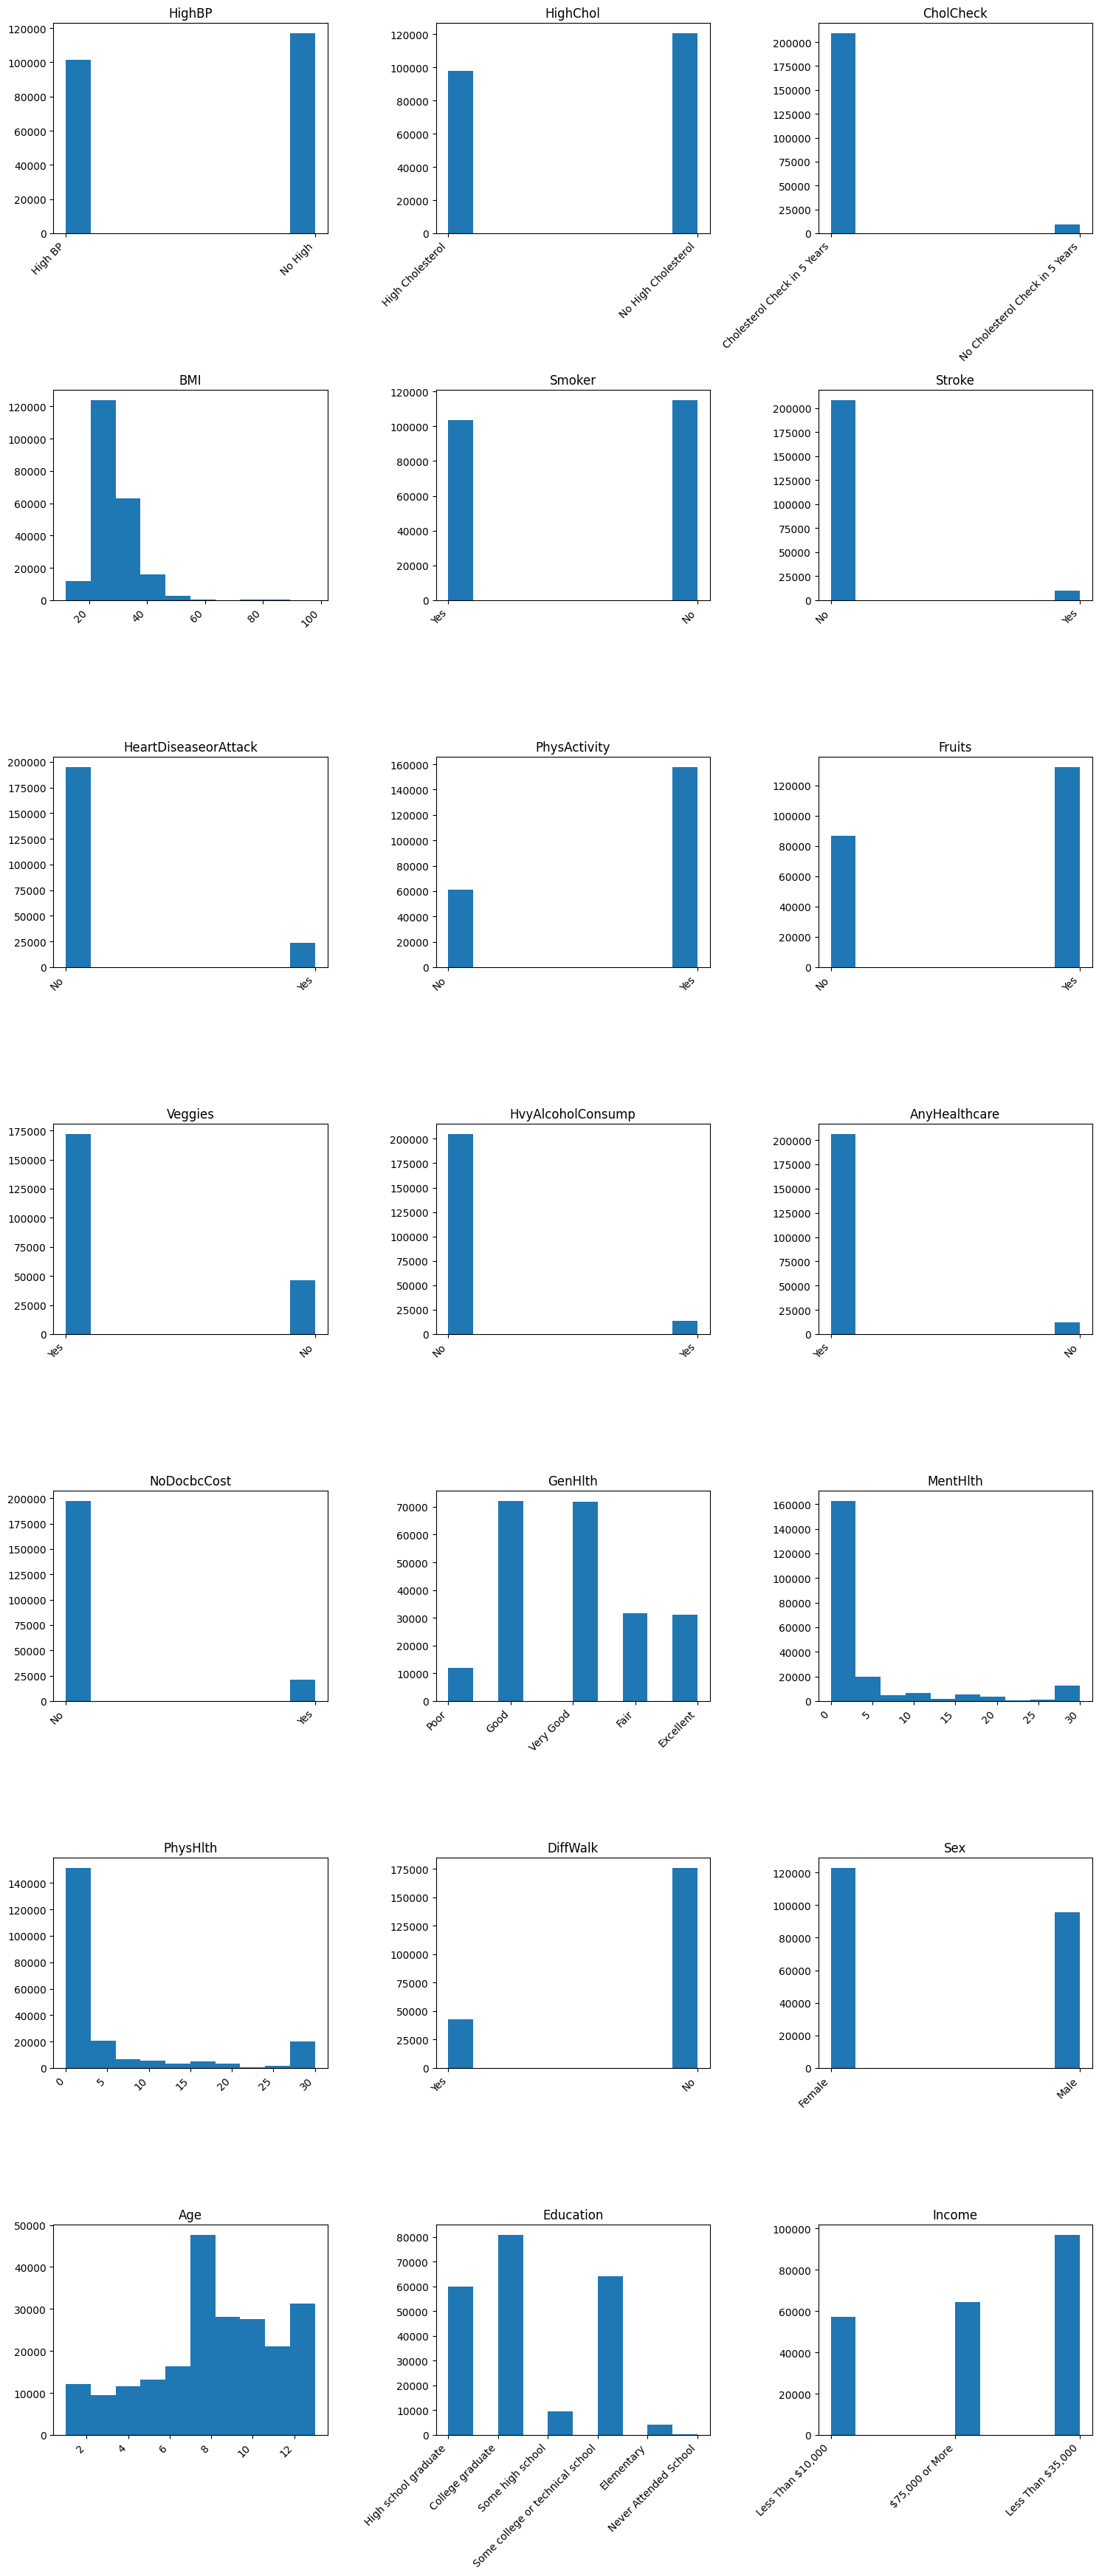

In [16]:
cols = list(df_vis.columns)
cols_df=cols[1:]
num_cols = 3
num_rows = math.ceil(len(cols_df) / num_cols)

plt.figure(figsize=(15, 5 * num_rows))

for i, col in enumerate(cols_df):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.hist(df_vis[col])
    plt.title(col)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

plt.show()

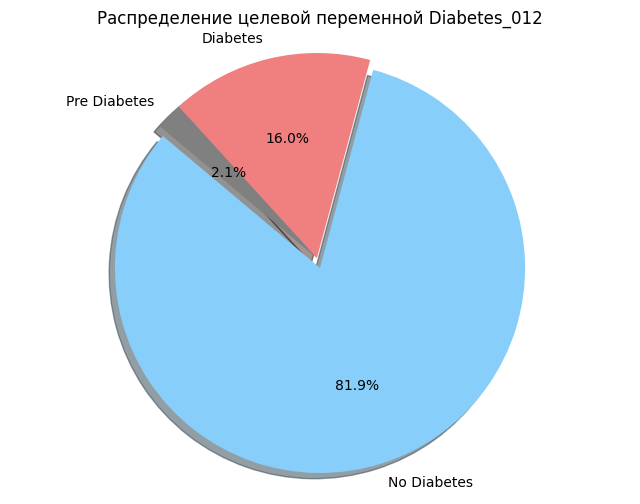

In [50]:
plt.figure(figsize=(8, 6))

labels = ['No Diabetes', 'Diabetes', 'Pre Diabetes']
sizes = [df_vis['Diabetes_012'].value_counts()[0], 
         df_vis['Diabetes_012'].value_counts()[1], 
         df_vis['Diabetes_012'].value_counts()[2]]
colors = ['lightskyblue', 'lightcoral', 'grey']
explode = (0.05, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, autopct='%.1f%%', colors=colors, shadow=True, startangle=140)

plt.title('Распределение целевой переменной Diabetes_012')

plt.axis('equal')
plt.show()

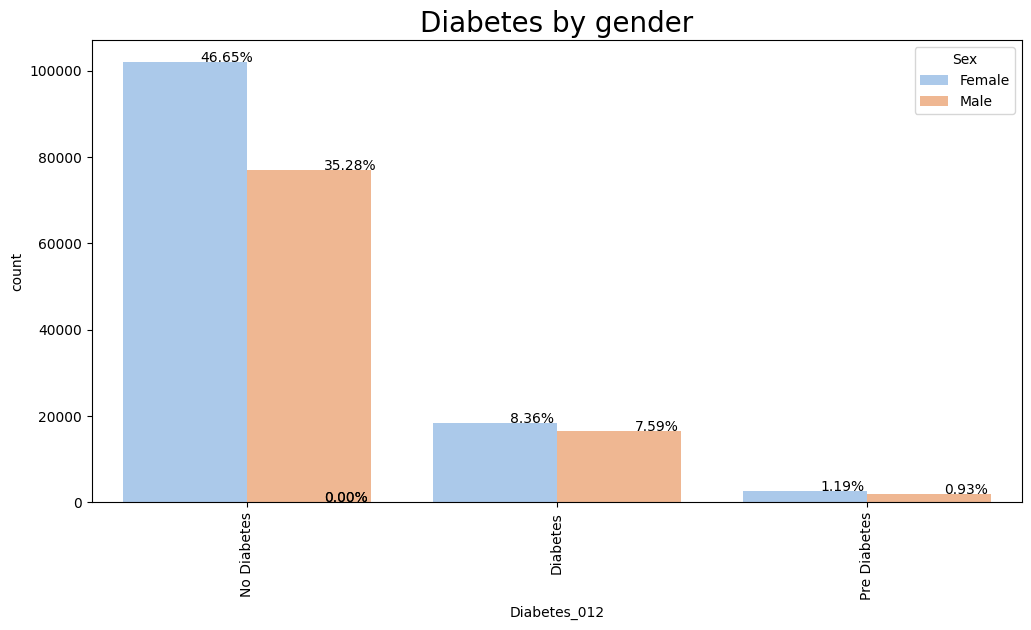

In [18]:
plt.figure(figsize=(12, 6))

x = sns.countplot(x='Diabetes_012', data=df_vis, hue='Sex', palette='pastel')

plt.xticks(rotation=90)

plt.title('Diabetes by gender', fontsize=20)

for i in x.patches:
    x.annotate('{:.2f}%'.format((i.get_height() / df_vis.shape[0]) * 100),
               (i.get_x() + 0.25, i.get_height() + 0.01))

plt.show()

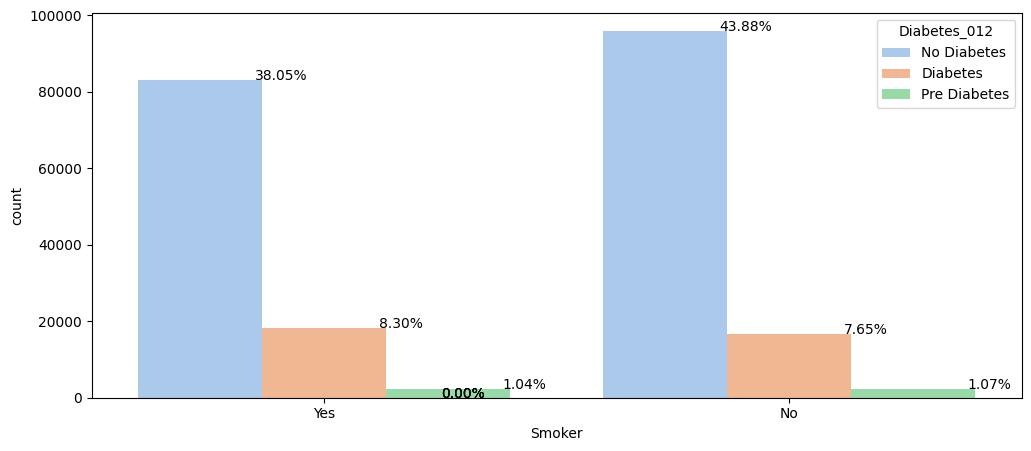

In [19]:
plt.figure(figsize=(12, 5))

x = sns.countplot(x='Smoker', hue='Diabetes_012', data=df_vis, palette='pastel')

for i in x.patches:
    x.annotate('{:.2f}%'.format((i.get_height() / df_vis.shape[0]) * 100),
               (i.get_x() + 0.25, i.get_height() + 0.01))

plt.show()

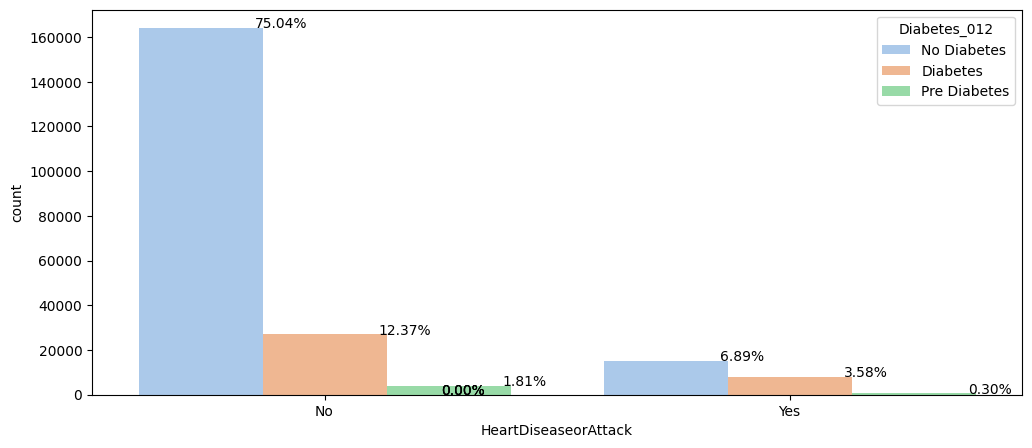

In [20]:
plt.figure(figsize=(12, 5))

x = sns.countplot(x='HeartDiseaseorAttack', hue='Diabetes_012', data=df_vis, palette='pastel')

for i in x.patches:
    x.annotate('{:.2f}%'.format((i.get_height() / df_vis.shape[0]) * 100),
               (i.get_x() + 0.25, i.get_height() + 0.01))

plt.show()

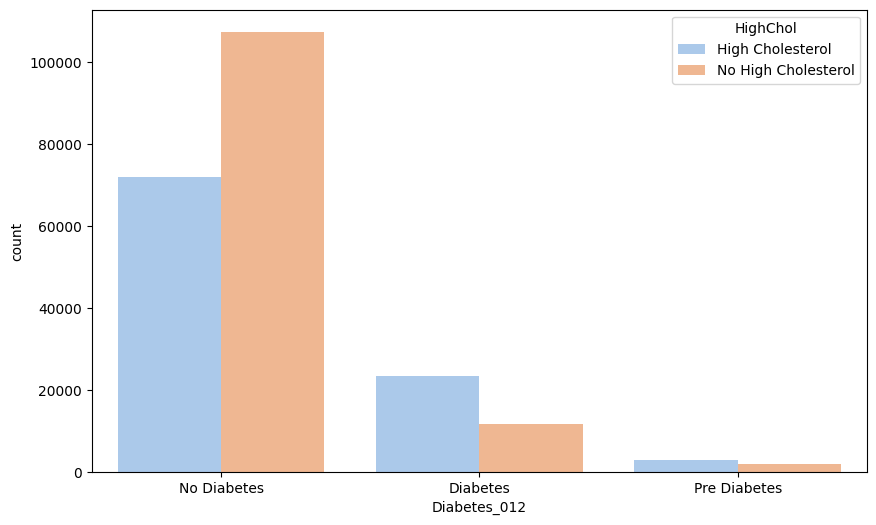

In [21]:
plt.figure(figsize=(10, 6))

sns.countplot(data=df_vis, x='Diabetes_012', hue='HighChol', palette='pastel')

plt.show()

<Figure size 1200x500 with 0 Axes>

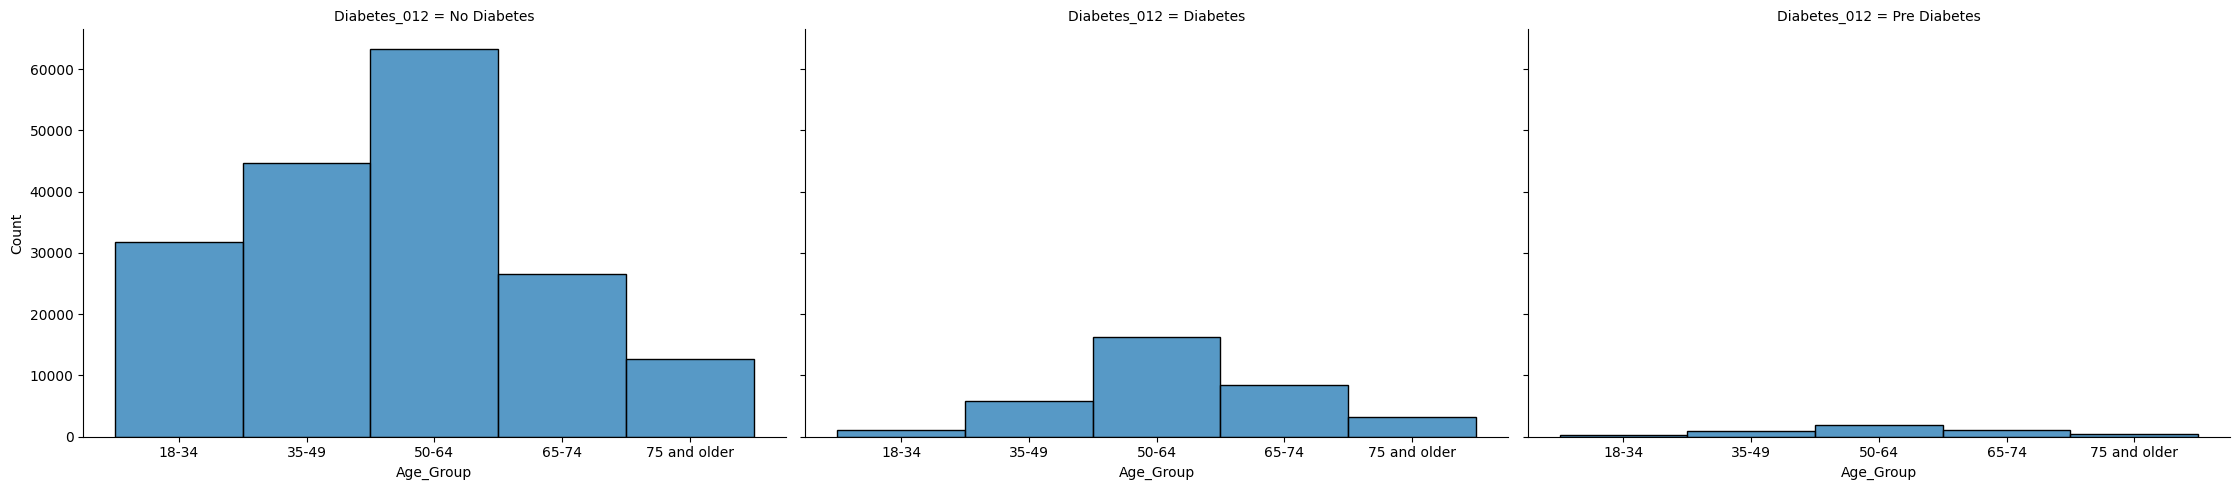

In [22]:
age_bins = [0,4,7,10,12,14]
age_labels = ['18-34', '35-49', '50-64', '65-74', '75 and older']
df_vis['Age_Group'] = pd.cut(df_vis['Age'], bins=age_bins, labels=age_labels)
plt.figure(figsize=(12, 5))
sns.displot(data=df_vis, col='Diabetes_012', x='Age_Group', palette='husl', height=5, aspect=1.5)

plt.show()

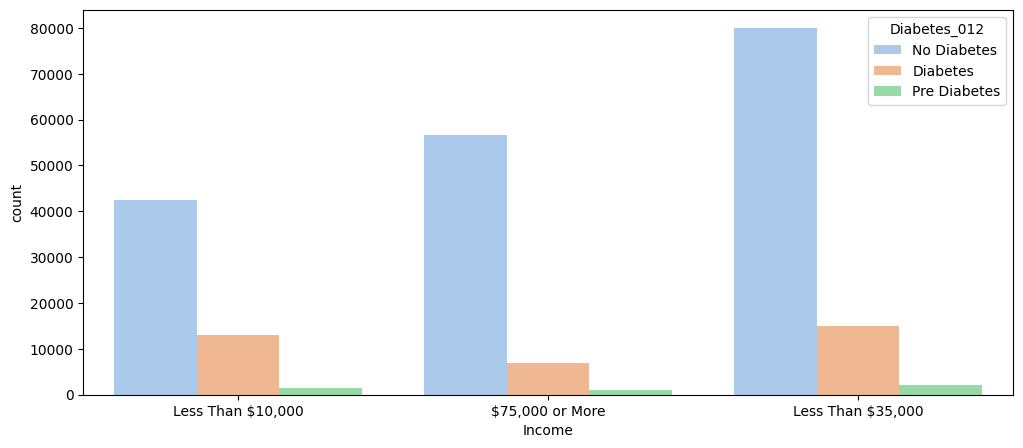

In [23]:
plt.figure(figsize=(12,5))
sns.countplot(x='Income', hue='Diabetes_012', data = df_vis, palette='pastel')
plt.show()

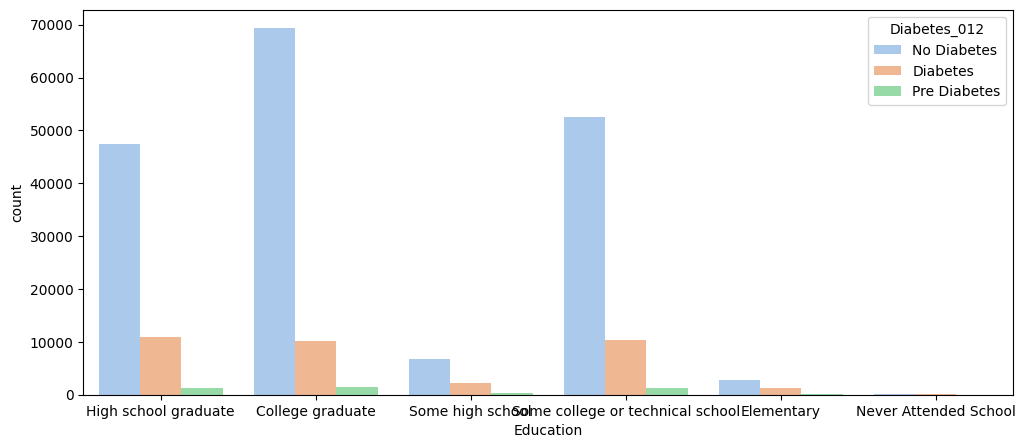

In [24]:
plt.figure(figsize=(12,5))
sns.countplot(x='Education', hue='Diabetes_012', data = df_vis, palette='pastel')
plt.show()

Краткое содержание визуализации:

1. мужчины и женщины в равной степени подвержены диабету.

2. люди старше 45 лет более подвержены диабету, чем молодые. С увеличением возраста увеличивается и число людей, страдающих диабетом.

3. с повышением уровня образования число людей, страдающих диабетом, уменьшается.

4. люди с низким доходом подвержены большему риску развития диабета, чем те, у кого он выше.


In [25]:
df=data.copy()
model = IsolationForest()
model.fit(df)
df['anomaly']= model.predict(df)
df

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,anomaly
0,0,1,1,1,40,1,0,0,0,0,...,0,5,18,15,1,0,9,4,3,-1
1,0,0,0,0,25,1,0,0,1,0,...,1,3,0,0,0,0,7,6,1,-1
2,0,1,1,1,28,0,0,0,0,1,...,1,5,30,30,1,0,9,4,8,-1
3,0,1,0,1,27,0,0,0,1,1,...,0,2,0,0,0,0,11,3,6,1
4,0,1,1,1,24,0,0,0,1,1,...,0,2,3,0,0,0,11,5,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0,1,1,1,45,0,0,0,0,1,...,0,3,0,5,0,1,5,6,7,1
253676,2,1,1,1,18,0,0,0,0,0,...,0,4,0,0,1,0,11,2,4,-1
253677,0,0,0,1,28,0,0,0,1,1,...,0,1,0,0,0,0,2,5,2,1
253678,0,1,0,1,23,0,0,0,0,1,...,0,3,0,0,0,1,7,5,1,1


In [26]:
df.drop(df[df['anomaly']==-1].index,inplace=True)
df.shape

(142380, 23)

In [27]:
df.drop(columns=['anomaly'], inplace=True)
df.shape

(142380, 22)

In [28]:
X = df.drop(['Diabetes_012'],axis=1)
Y = df['Diabetes_012']

In [ ]:
X = df.drop(['Diabetes_012'],axis=1)
Y = df['Diabetes_012']

scaler = StandardScaler()
scaler.fit(X)
scaled_features = scaler.transform(X)

sm = SMOTEENN()
x_resampled, y_resampled = sm.fit_resample(X,Y)

In [29]:
scaler = StandardScaler()
scaler.fit(X)
scaled_features = scaler.transform(X)
X = pd.DataFrame(scaled_features,columns=df.columns[1:])
X.head(10)

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.222597,-0.820157,0.150487,-0.170979,-0.856956,-0.101892,-0.210533,0.459866,0.716571,0.423226,...,0.133688,-0.153726,-0.352098,-0.378105,-0.394883,-0.240222,-0.868947,0.985980,-2.420057,-0.228157
1,1.222597,1.219278,0.150487,-0.672679,-0.856956,-0.101892,-0.210533,0.459866,0.716571,0.423226,...,0.133688,-0.153726,-0.352098,0.271269,-0.394883,-0.240222,-0.868947,0.985980,-0.151209,-1.379313
2,1.222597,-0.820157,0.150487,0.330721,1.166920,-0.101892,-0.210533,-2.174547,-1.395536,-2.362801,...,0.133688,-0.153726,0.843306,-0.378105,2.808588,-0.240222,-0.868947,0.338713,0.983215,0.347421
3,1.222597,1.219278,0.150487,-0.505446,1.166920,-0.101892,-0.210533,0.459866,-1.395536,0.423226,...,0.133688,-0.153726,0.843306,-0.378105,-0.394883,4.162817,-0.868947,0.985980,-1.285633,-1.379313
4,-0.817931,-0.820157,0.150487,-0.672679,-0.856956,-0.101892,-0.210533,-2.174547,-1.395536,0.423226,...,0.133688,-0.153726,-0.352098,-0.378105,-0.394883,-0.240222,1.150818,0.015079,-1.285633,-1.954891
5,-0.817931,-0.820157,0.150487,-0.505446,1.166920,-0.101892,-0.210533,0.459866,0.716571,0.423226,...,0.133688,-0.153726,0.843306,-0.378105,-0.394883,-0.240222,1.150818,1.633247,0.983215,0.922998
6,-0.817931,-0.820157,0.150487,-0.338213,1.166920,-0.101892,-0.210533,-2.174547,-1.395536,0.423226,...,0.133688,-0.153726,0.843306,-0.378105,3.037408,-0.240222,-0.868947,-0.308554,-0.151209,0.347421
7,1.222597,-0.820157,0.150487,0.832422,-0.856956,-0.101892,-0.210533,0.459866,-1.395536,-2.362801,...,0.133688,-0.153726,-0.352098,0.704185,-0.394883,-0.240222,-0.868947,-0.632188,0.983215,0.922998
8,1.222597,1.219278,0.150487,-1.174380,-0.856956,-0.101892,-0.210533,0.459866,0.716571,0.423226,...,0.133688,-0.153726,0.843306,-0.378105,-0.394883,-0.240222,-0.868947,0.662346,-1.285633,-1.954891
9,-0.817931,-0.820157,0.150487,-0.839913,1.166920,-0.101892,-0.210533,0.459866,-1.395536,-2.362801,...,0.133688,-0.153726,-0.352098,-0.378105,-0.394883,-0.240222,1.150818,-0.308554,-0.151209,-0.228157


In [30]:
sm = SMOTEENN()
x_resampled, y_resampled = sm.fit_resample(X,Y)

In [31]:
Xre_train, Xre_test, Yre_train, Yre_test = train_test_split(x_resampled, y_resampled, test_size=0.3, random_state=42)

In [32]:
def hyperparameter_tuning(models, param_grid, Xre_train, Yre_train, Xre_test, Yre_test, results):
    for name, model in models.items():
        print(f"Tuning hyperparameters for {name}...")
        param_grid_name = param_grid[name]
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid_name, scoring='accuracy', cv=5, n_jobs=-1)

        start_time = time.time()
        
        grid_search.fit(Xre_train, Yre_train)
        
        end_time = time.time()
        
        best_params = grid_search.best_params_
        best_model = grid_search.best_estimator_

        training_time = end_time - start_time
        
        Yre_pred = best_model.predict(Xre_test)
        accuracy = accuracy_score(Yre_test, Yre_pred)
        precision = precision_score(Yre_test, Yre_pred, average='weighted')
        recall = recall_score(Yre_test, Yre_pred, average='weighted')
        f1 = f1_score(Yre_test, Yre_pred, average='weighted')
        roc_auc = roc_auc_score(Yre_test, best_model.predict_proba(Xre_test), multi_class='ovr', average='weighted')
        confusion = confusion_matrix(Yre_test, Yre_pred)

        results[name] = {
            'best_params': best_params,
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1': f1,
            'roc_auc': roc_auc,
            'confusion_matrix': confusion,
            'classification_report': classification_report(Yre_test, Yre_pred),
            'training_time': training_time
        }

In [33]:
class GradientBoostingClassifier_own(BaseEstimator, ClassifierMixin):
    def __init__(self, learning_rate=0.1, max_depth=5, n_estimators=150, random_state=0):
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.n_estimators = n_estimators
        self.random_state = random_state

    def __softmax(self, predictions):
        exp = np.exp(predictions)
        return exp / np.sum(exp, axis=1, keepdims=True)

    def fit(self, X, y):
        self.K = len(np.unique(y))
        self.trees = {k: [] for k in range(self.K)}
        one_hot_y = pd.get_dummies(y).to_numpy()
        predictions = np.zeros(one_hot_y.shape)

        for _ in range(self.n_estimators):
            probabilities = self.__softmax(predictions)

            for k in range(self.K):
                residuals = one_hot_y.T[k] - probabilities.T[k]

                tree = DecisionTreeRegressor(criterion='friedman_mse', max_depth=self.max_depth,
                                             random_state=self.random_state)
                tree.fit(X, residuals)
                self.trees[k].append(tree)

                predictions.T[k] += self.learning_rate * tree.predict(X)

    def predict(self, samples):
        predictions = np.zeros((len(samples), self.K))

        for i in range(self.n_estimators):
            for k in range(self.K):
                predictions.T[k] += self.learning_rate * self.trees[k][i].predict(samples)

        return np.argmax(predictions, axis=1)

    def predict_proba(self, samples):
        predictions = np.zeros((len(samples), self.K))

        for i in range(self.n_estimators):
            for k in range(self.K):
                predictions.T[k] += self.learning_rate * self.trees[k][i].predict(samples)

        return self.__softmax(predictions)

    def get_params(self, deep=True):
        return {
            'learning_rate': self.learning_rate,
            'max_depth': self.max_depth,
            'n_estimators': self.n_estimators,
            'random_state': self.random_state
        }

In [34]:
class AdaBoost_own(BaseEstimator, ClassifierMixin):
    def __init__(self, n_estimators=300, learning_rate=0.3, max_depth=1, random_state=0):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.random_state = random_state
        self.stumps = []
        self.weights = []

    def _update_weights(self, y, stump_predictions, stump_weight):
        m = len(y)
        y_bin = label_binarize(y, classes=np.arange(self.K))
        probabilities = np.clip(stump_predictions, 1e-10, 1-1e-10)
        log_loss = -np.sum(y_bin * np.log(probabilities), axis=1)

        if np.isnan(log_loss).any():
            return np.ones(m)
        
        if stump_weight == 0:
            return np.ones(m)
        else:
            return np.exp(-stump_weight * log_loss)

    def _normalize(self, weights):
        min_weight = np.min(weights[np.nonzero(weights)])
        min_weight = min_weight / 2 if min_weight > 0 else 0.5
        weights = np.where(weights < min_weight, min_weight, weights)
        return weights / np.sum(weights)

    def fit(self, X, y):
        n_samples = len(y)
        self.K = len(np.unique(y))
        weights = np.ones(n_samples) / n_samples

        for iteration in range(self.n_estimators):
            stump = DecisionTreeClassifier(max_depth=self.max_depth, random_state=self.random_state)
            stump.fit(X, y, sample_weight=weights)
            stump_predictions = stump.predict_proba(X)

            wrong_predictions = np.argmax(stump_predictions, axis=1) != y
            stump_error = np.sum(weights[wrong_predictions])

            if iteration >= self.n_estimators - 1:
                break

            if stump_error >= 0.55:
                continue

            stump_weight = self.learning_rate * np.log((1 - stump_error) / stump_error) + np.log(self.K - 1)
            self.stumps.append(stump)
            self.weights.append(stump_weight)

            weights = self._update_weights(y, stump_predictions, stump_weight)
            weights = self._normalize(weights)

        if not self.stumps:
            print("Предупреждение: Ни одно дерево не было обучено.")

    def predict(self, samples):
        n_samples = len(samples)
        predictions = np.zeros((n_samples, self.K))

        if not self.stumps:
            return np.zeros(n_samples)

        for i in range(len(self.stumps)):
            stump_proba = self.stumps[i].predict_proba(samples)
            predictions += stump_proba * self.weights[i]

        return np.argmax(predictions, axis=1)

    def predict_proba(self, samples):
        n_samples = len(samples)
        proba = np.zeros((n_samples, self.K))

        if not self.stumps:
            return np.zeros((n_samples, self.K))

        for i in range(len(self.stumps)):
            stump_proba = self.stumps[i].predict_proba(samples)
            proba += stump_proba * self.weights[i]

        proba = proba / np.sum(proba, axis=1, keepdims=True)
        return proba

    def get_params(self, deep=True):
        return {
            'n_estimators': self.n_estimators,
            'learning_rate': self.learning_rate,
            'max_depth': self.max_depth,
            'random_state': self.random_state
        }

In [35]:
class XGBoostTree:
    def fit(self, x, gradient, hessian, max_depth=3, min_samples_leaf=5, reg_lambda=1, gamma=1):
        self.tree = DecisionTreeRegressor(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
        self.reg_lambda = reg_lambda
        self.gamma = gamma
        self.tree.fit(x, gradient)
        self._compute_leaf_values(x, gradient, hessian)
        return self

    def _compute_leaf_values(self, x, gradient, hessian):
        self.leaf_values = {}
        node_indices = self.tree.apply(x)
        for leaf in np.unique(node_indices):
            indices = np.where(node_indices == leaf)[0]
            g = gradient[indices].sum()
            h = hessian[indices].sum()
            self.leaf_values[leaf] = -g / (h + self.reg_lambda)

    def predict(self, X):
        leaf_indices = self.tree.apply(X)
        return np.array([self.leaf_values.get(leaf, 0) for leaf in leaf_indices])

class XGBoostClassifier_own(BaseEstimator, ClassifierMixin):
    def __init__(self, max_depth=3, min_samples_leaf=5, learning_rate=0.2, n_estimators=5, reg_lambda=1.5, gamma=1):
        self.max_depth = max_depth
        self.min_samples_leaf = min_samples_leaf
        self.learning_rate = learning_rate
        self.n_estimators = n_estimators
        self.reg_lambda = reg_lambda
        self.gamma = gamma
        self.estimators = []

    @staticmethod
    def sigmoid(x):
        return 1 / (1 + np.exp(-x))

    def softmax(self, x):
        e_x = np.exp(x - np.max(x))
        return e_x / e_x.sum(axis=1, keepdims=True)

    def grad(self, preds, labels):
        preds = self.softmax(preds)
        grad = preds - labels
        return grad

    def hess(self, preds, labels):
        preds = self.softmax(preds)
        hess = preds * (1 - preds)
        return hess

    def fit(self, X, y):
        self.classes_ = np.unique(y)
        y_one_hot = np.eye(len(self.classes_))[y]

        self.base_pred = np.zeros((X.shape[0], len(self.classes_)))

        for _ in range(self.n_estimators):
            gradient = self.grad(self.base_pred, y_one_hot)
            hessian = self.hess(self.base_pred, y_one_hot)

            for i in range(len(self.classes_)):
                gradient_class = gradient[:, i]
                hessian_class = hessian[:, i]

                tree = XGBoostTree().fit(X, gradient_class, hessian_class, max_depth=self.max_depth, min_samples_leaf=self.min_samples_leaf, reg_lambda=self.reg_lambda, gamma=self.gamma)
                update = self.learning_rate * tree.predict(X)
                self.base_pred[:, i] += update
                self.estimators.append(tree)

    def predict_proba(self, X):
        pred = np.zeros((X.shape[0], len(self.classes_)))
        for i in range(len(self.classes_)):
            for estimator in self.estimators[i::len(self.classes_)]:
                pred[:, i] += self.learning_rate * estimator.predict(X)
        return self.softmax(pred)

    def predict(self, X):
        proba = self.predict_proba(X)
        return np.argmax(proba, axis=1)

    def get_params(self, deep=True):
        return {
            'max_depth': self.max_depth,
            'learning_rate': self.learning_rate,
            'n_estimators': self.n_estimators,
        }

    def set_params(self, **params):
        for key, value in params.items():
            setattr(self, key, value)
        return self

In [36]:
class SimpleHistogram:
    def __init__(self, bins=256):
        self.bins = bins
        self.hist = None

    def fit(self, feature, grad, hess):
        min_val = np.min(feature)
        max_val = np.max(feature)
        self.hist = np.zeros((self.bins, 2), dtype=np.float64)
        bin_width = (max_val - min_val) / self.bins

        bin_indices = np.clip(((feature - min_val) / bin_width).astype(int), 0, self.bins - 1)
        np.add.at(self.hist[:, 0], bin_indices, grad)
        np.add.at(self.hist[:, 1], bin_indices, hess)

        return self.hist, bin_width, min_val

    def find_best_split(self):
        best_gain = -np.inf
        best_threshold = None
        sum_grad_left = 0
        sum_hess_left = 0
        total_grad = np.sum(self.hist[:, 0])
        total_hess = np.sum(self.hist[:, 1])
        
        for bin_idx in range(self.bins):
            sum_grad_left += self.hist[bin_idx, 0]
            sum_hess_left += self.hist[bin_idx, 1]
            sum_grad_right = total_grad - sum_grad_left
            sum_hess_right = total_hess - sum_hess_left
            if sum_hess_left > 0 and sum_hess_right > 0:
                gain = (sum_grad_left ** 2 / sum_hess_left) + (sum_grad_right ** 2 / sum_hess_right)
                if gain > best_gain:
                    best_gain = gain
                    best_threshold = bin_idx

        return best_threshold, best_gain

class LightGBMClassifier_own(BaseEstimator, ClassifierMixin):
    def __init__(self, learning_rate=0.1, max_depth=3, n_estimators=100, num_bins=256, top_rate=0.2, other_rate=0.1, max_conflict_rate=0.1):
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.n_estimators = n_estimators
        self.num_bins = num_bins
        self.top_rate = top_rate
        self.other_rate = other_rate
        self.max_conflict_rate = max_conflict_rate
        self.trees = []
        self.classes_ = None

    def alternative_expit(self, x):
        return 1 / (1 + np.exp(-x))

    def softmax(self, x):
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

    def fit(self, X, y):
        self.classes_ = np.unique(y)
        self._le = LabelEncoder().fit(y)
        y_encoded = self._le.transform(y)
        self.n_classes_ = len(self.classes_)
        self.trees = []
        X_efb = self._apply_efb(X)

        y_pred = np.zeros((X.shape[0], self.n_classes_))

        grad, hess = self._compute_grad_hess(y_encoded, y_pred)
        for _ in range(self.n_estimators):
            sampled_X, sampled_grad, sampled_hess = self._apply_goss(X_efb, grad, hess)
            tree = self._build_leaf_wise_tree(sampled_X, sampled_grad, sampled_hess)
            self.trees.append(tree)
            y_pred += self.learning_rate * self._predict_tree(tree, X_efb)
            grad, hess = self._compute_grad_hess(y_encoded, y_pred)

        return self

    def _compute_grad_hess(self, y_encoded, y_pred):
        prob = self.softmax(y_pred)
        grad = prob
        grad[np.arange(len(y_encoded)), y_encoded] -= 1
        hess = prob * (1 - prob)
        return grad, hess

    def _apply_efb(self, X):
        n_samples, n_features = X.shape
        feature_conflict_matrix = np.zeros((n_features, n_features))
        
        for i, j in combinations(range(n_features), 2):
            col_i = X.columns.get_loc(X.columns[i])
            col_j = X.columns.get_loc(X.columns[j])
            conflict_rate = np.mean((X.iloc[:, col_i] != 0) & (X.iloc[:, col_j] != 0))
            feature_conflict_matrix[col_i, col_j] = feature_conflict_matrix[col_j, col_i] = conflict_rate

        used_features = set()
        bundled_features = []
        
        for i in range(n_features):
            if i in used_features:
                continue
            bundle = [i]
            for j in range(i + 1, n_features):
                if j in used_features:
                    continue
                if feature_conflict_matrix[i, j] <= self.max_conflict_rate:
                    bundle.append(j)
                    used_features.add(j)
            used_features.add(i)
            bundled_features.append(bundle)

        new_X = np.zeros((n_samples, len(bundled_features)))
        for new_idx, bundle in enumerate(bundled_features):
            new_X[:, new_idx] = np.sum(X.iloc[:, bundle], axis=1)
        return new_X

    def _apply_goss(self, X, grad, hess):
        num_data = grad.shape[0]
        top_n = int(self.top_rate * num_data)
        other_n = int(self.other_rate * num_data)

        sorted_idx = np.argsort(np.abs(grad), axis=0)[::-1]
        top_idx = sorted_idx[:top_n, :]
        other_idx = sorted_idx[top_n:top_n + other_n, :]

        sampled_idx = np.vstack((top_idx, other_idx))

        sampled_X = X[sampled_idx.ravel()]
        sampled_grad = grad[sampled_idx.ravel()]
        sampled_hess = hess[sampled_idx.ravel()]

        sampled_X = sampled_X.reshape(-1, X.shape[1])

        sampled_hess[other_n:, :] *= (1.0 / self.other_rate)

        return sampled_X, sampled_grad, sampled_hess

    def _build_leaf_wise_tree(self, X, grad, hess):
        if X.ndim > 2:
            X = X.reshape(X.shape[0], -1)

        tree = DecisionTreeRegressor(max_depth=self.max_depth)
        tree.fit(X, grad / (hess + 1e-6))

        return tree

    def _predict_tree(self, tree, X):
        return tree.predict(X)

    def predict_proba(self, X):
        X_efb = self._apply_efb(X)
        y_pred = np.zeros((X.shape[0], self.n_classes_))
        for tree in self.trees:
            y_pred += self.learning_rate * self._predict_tree(tree, X_efb)

        return self.softmax(y_pred)

    def predict(self, X):
        proba = self.predict_proba(X)
        class_index = np.argmax(proba, axis=1)
        return self._le.inverse_transform(class_index)
    
    def get_params(self, deep=True):
        return {
            'learning_rate': self.learning_rate,
            'max_depth': self.max_depth,
            'n_estimators': self.n_estimators
        }

In [37]:
class CatBoostClassifier_own(BaseEstimator, ClassifierMixin):
    def __init__(self, learning_rate=0.1, max_depth=6, n_estimators=100, l2_leaf_reg=3, cat_features=None):
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.n_estimators = n_estimators
        self.l2_leaf_reg = l2_leaf_reg
        self.cat_features = cat_features if cat_features is not None else []
        self.trees = []
        self.classes_ = None
        self._le = None

    def fit(self, X, y):
        X = self._preprocess_data(X)

        self.classes_ = np.unique(y)
        self._le = LabelEncoder().fit(y)
        y_encoded = self._le.transform(y)
        
        self.trees = {class_label: [] for class_label in self.classes_}
        y_pred = np.zeros((X.shape[0], len(self.classes_)))

        for _ in range(self.n_estimators):
            for class_index, class_label in enumerate(self.classes_):
                residual = (y_encoded == class_index) - self._alternative_expit(y_pred[:, class_index])
                tree = DecisionTreeRegressor(max_depth=self.max_depth, random_state=42)
                tree.fit(X, residual)
                self.trees[class_label].append(tree)
                y_pred[:, class_index] += self.learning_rate * tree.predict(X)

        return self

    def _preprocess_data(self, X):
        X = X.copy()
        for col in self.cat_features:
            X[col] = X[col].astype('category').cat.codes
        X = X.fillna(0)
        return X

    def _alternative_expit(self, x):
        return 1 / (1 + np.exp(-x))

    def predict_proba(self, X):
        X = self._preprocess_data(X)
        y_pred = np.zeros((X.shape[0], len(self.classes_)))
        
        for class_index, class_label in enumerate(self.classes_):
            for tree in self.trees[class_label]:
                y_pred[:, class_index] += self.learning_rate * tree.predict(X)
        
        proba = self._alternative_expit(y_pred)
        return proba / proba.sum(axis=1, keepdims=True)

    def predict(self, X):
        proba = self.predict_proba(X)
        class_index = np.argmax(proba, axis=1)
        return self._le.inverse_transform(class_index)
    
    def get_params(self, deep=True):
        return {
            'learning_rate': self.learning_rate,
            'max_depth': self.max_depth,
            'n_estimators': self.n_estimators,
            'l2_leaf_reg': self.l2_leaf_reg,
            'cat_features': self.cat_features
        }

    def set_params(self, **params):
        for param, value in params.items():
            setattr(self, param, value)
        return self

In [50]:
class HistGradientBoostingClassifier_own(BaseEstimator, ClassifierMixin):
    def __init__(self, *, learning_rate=0.1, max_depth=3, max_iter=100, max_bins=256):
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.max_iter = max_iter
        self.max_bins = max_bins
        
    def _validate_parameters(self):
        if not (0 < self.learning_rate):
            raise ValueError("learning_rate должен быть больше 0.")
        if not (1 <= self.max_depth):
            raise ValueError("max_depth должен быть не меньше 1.")
        if not (1 <= self.max_iter):
            raise ValueError("max_iter должен быть не меньше 1.")
    
    def __softmax(self, predictions):
        exp = np.exp(predictions - np.max(predictions, axis=1, keepdims=True))
        return exp / np.sum(exp, axis=1, keepdims=True)
    
    def _create_histograms(self, X, y):
        discretizer = KBinsDiscretizer(n_bins=self.max_bins, encode='ordinal', strategy='uniform')
        X_binned = discretizer.fit_transform(X)
        return X_binned, discretizer
    
    def _initialize(self, X, y):
        self.n_classes_ = np.unique(y).size
        self.estimators_ = [[] for _ in range(self.n_classes_)]
        self.init_prediction_ = np.zeros((X.shape[0], self.n_classes_))
        
    def _fit_stage(self, X_binned, gradient, hessian, tree):
        tree.fit(X_binned, gradient / (hessian + 1e-10))
        return tree

    def fit(self, X, y):
        X, y = check_X_y(X, y)
        self.y_ = y
        self._validate_parameters()
        self._initialize(X, y)

        X_binned, self.binner_ = self._create_histograms(X, y)
        self.init_prediction_ = np.zeros((X.shape[0], self.n_classes_))

        for i in range(self.max_iter):
            prob = self.__softmax(self.init_prediction_)
            gradient = np.zeros_like(prob)
            hessian = np.zeros_like(prob)

            for k in range(self.n_classes_):
                y_k = (y == k).astype(int)
                gradient[:, k] = y_k - prob[:, k]
                hessian[:, k] = prob[:, k] * (1 - prob[:, k])
            
            for k in range(self.n_classes_):
                tree = DecisionTreeRegressor(max_depth=self.max_depth)
                tree = self._fit_stage(X_binned, gradient[:, k], hessian[:, k], tree)
                self.estimators_[k].append(tree)
                
                update = self.learning_rate * tree.predict(X_binned)
                self.init_prediction_[:, k] += update

        return self

    def predict(self, X):
        X = check_array(X)
        X_binned = self.binner_.transform(X)
        pred = np.zeros((X.shape[0], self.n_classes_))

        for k in range(self.n_classes_):
            for tree in self.estimators_[k]:
                pred[:, k] += self.learning_rate * tree.predict(X_binned)

        return np.argmax(pred, axis=1)

    def predict_proba(self, X):
        X = check_array(X)
        X_binned = self.binner_.transform(X)
        pred = np.zeros((X.shape[0], self.n_classes_))

        for k in range(self.n_classes_):
            for tree in self.estimators_[k]:
                pred[:, k] += self.learning_rate * tree.predict(X_binned)

        return self.__softmax(pred)
    
    def get_params(self, deep=True):
        return {
            'learning_rate': self.learning_rate,
            'max_depth': self.max_depth,
            'max_iter': self.max_iter,
            'max_bins': self.max_bins
        }

    def set_params(self, **params):
        for param, value in params.items():
            setattr(self, param, value)
        return self

In [46]:
models = {
    'AdaBoost_own': AdaBoost_own(),
    'XGBoost_own': XGBoostClassifier_own(),
    'Gradient Boosting_own': GradientBoostingClassifier_own(),
    'LightGBM_own': LightGBMClassifier_own(),
    'CatBoost_own': CatBoostClassifier_own(),
    'Histogram-Based Gradient Boosting_own': HistGradientBoostingClassifier_own()
}

param_grid = {
    'AdaBoost_own': {'n_estimators': [100, 200, 300],
                     'learning_rate': [0.1, 0.2, 0.3],
                     'max_depth': [10, 20, 30]},
    'Gradient Boosting_own': {'learning_rate': [0.05, 0.1, 0.2],
                              'max_depth': [3, 5, 7],
                              'n_estimators': [100, 200, 300]},
    'LightGBM_own': {'learning_rate': [0.1, 0.2, 0.3],
                 'max_depth': [10, 20, 30],
                 'n_estimators': [100, 200, 300]},
    'CatBoost_own': {'learning_rate': [0.1, 0.2, 0.3],
                 'max_depth': [10, 15, 20],
                 'n_estimators': [100, 200, 300]},
    'XGBoost_own': {'n_estimators': [100, 150, 200],
                'learning_rate': [0.1, 0.2, 0.3],
                'max_depth': [5, 10, 15]},
    'Histogram-Based Gradient Boosting_own': {'learning_rate': [0.1, 0.2, 0.3],
                                          'max_depth': [10, 20, 30],
                                          'max_iter': [100, 200, 300]}
}

results = {}

hyperparameter_tuning(models, param_grid, Xre_train, Yre_train, Xre_test, Yre_test, results)

Генерация матрицы ошибок для модели AdaBoost_own


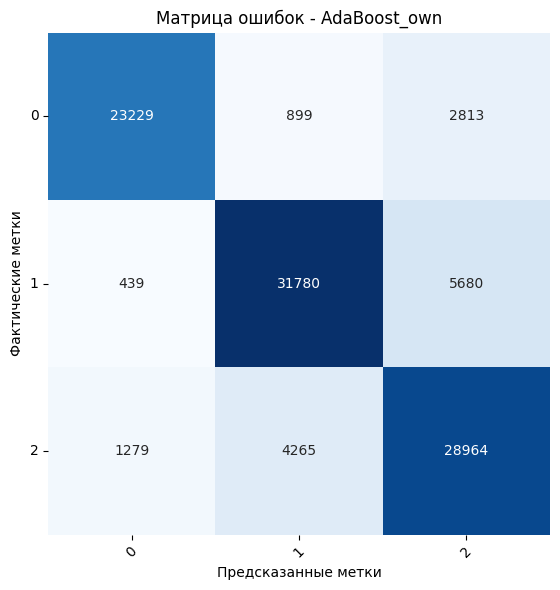

Генерация матрицы ошибок для модели XGBoost_own


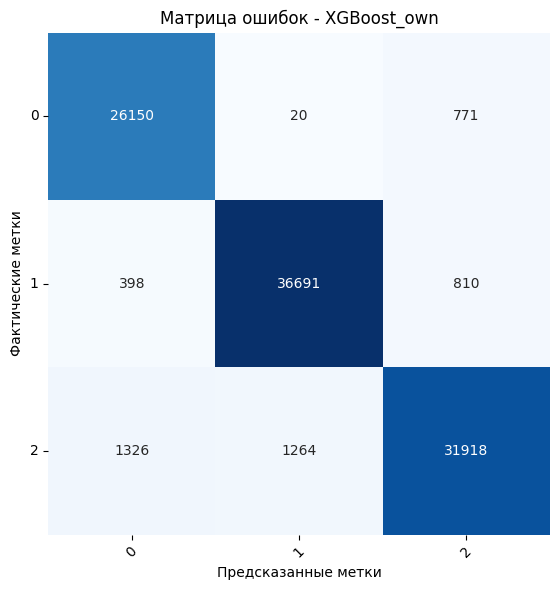

Генерация матрицы ошибок для модели Gradient Boosting_own


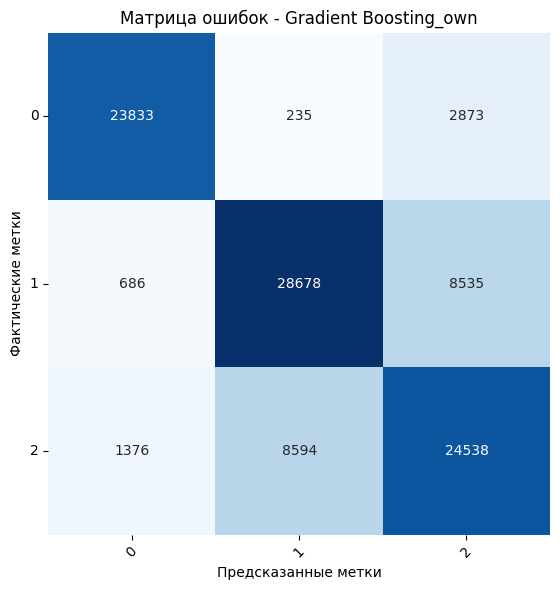

Генерация матрицы ошибок для модели LightGBM_own


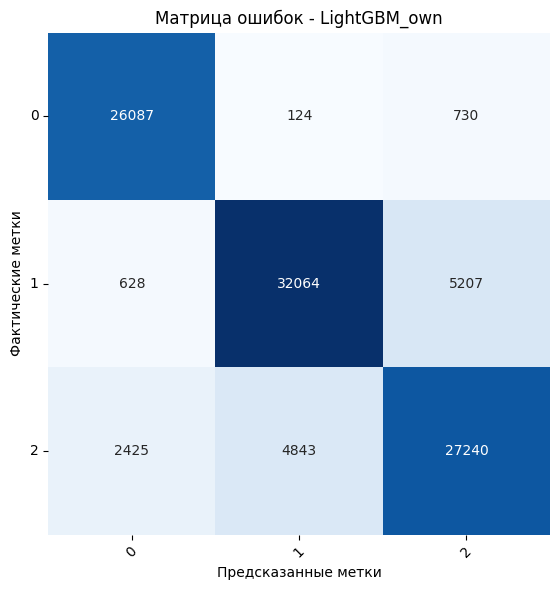

Генерация матрицы ошибок для модели CatBoost_own


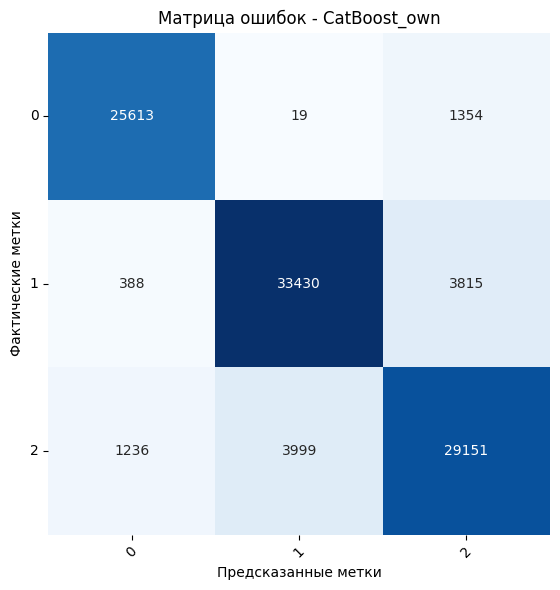

Генерация матрицы ошибок для модели Histogram-Based Gradient Boosting_own


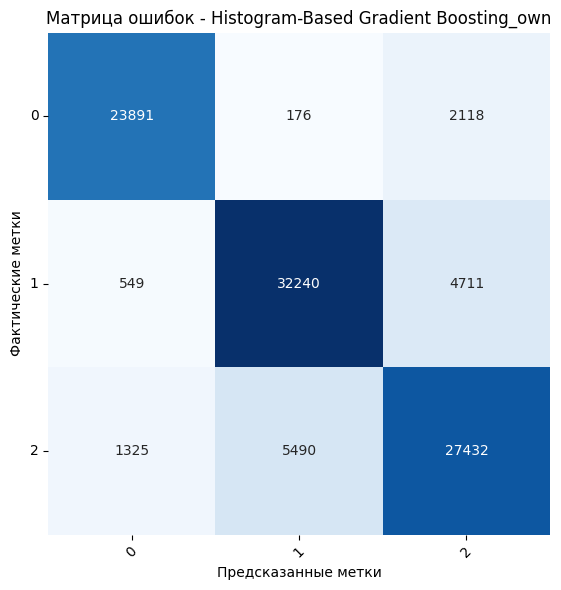

In [68]:
def plot_confusion_matrix(confusion_matrix, model_name):
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, square=True, ax=ax)
    ax.set_xlabel('Предсказанные метки')
    ax.set_ylabel('Фактические метки')
    ax.set_title(f'Матрица ошибок - {model_name}')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

def generate_confusion_matrices(results):
    for name, result in results.items():
        print(f"Генерация матрицы ошибок для модели {name}")
        confusion_matrix = result['confusion_matrix']
        plot_confusion_matrix(confusion_matrix, model_name=name)

generate_confusion_matrices(results)

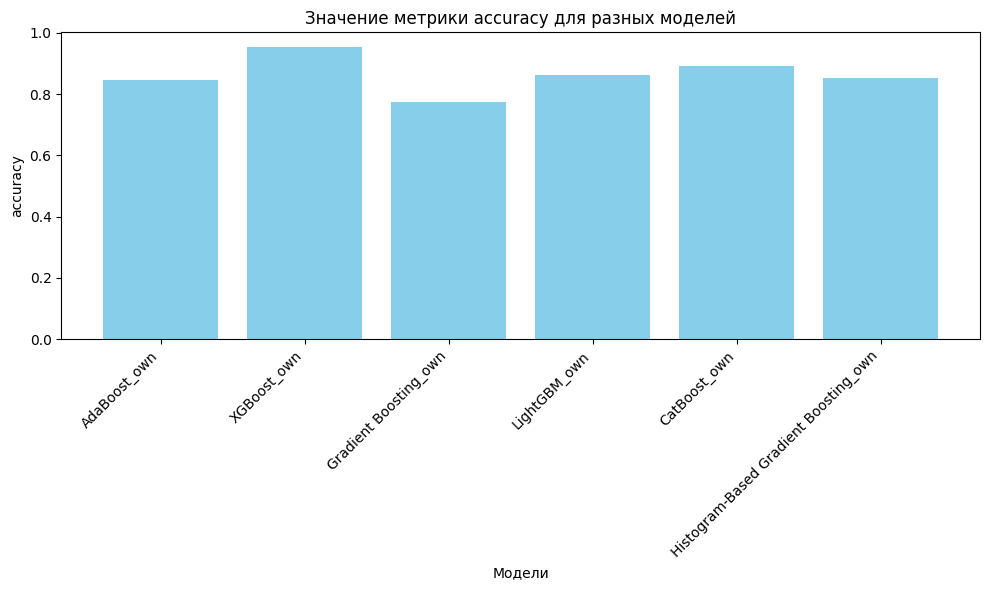

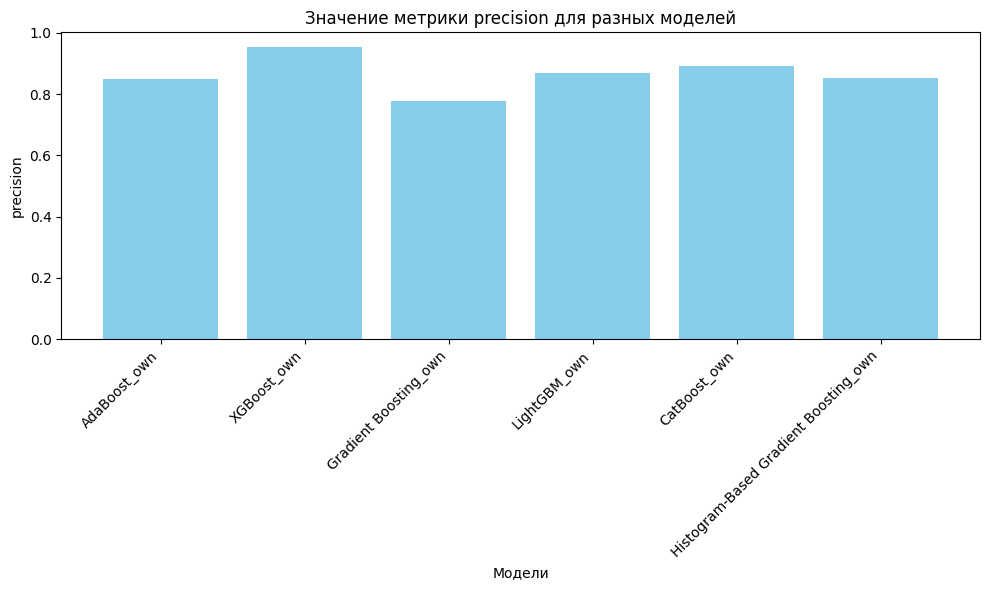

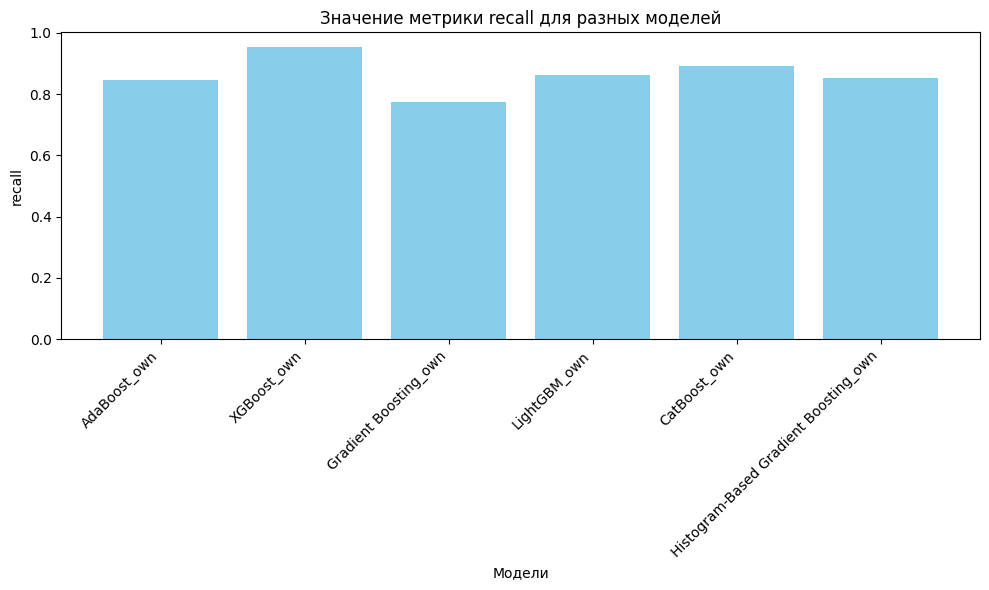

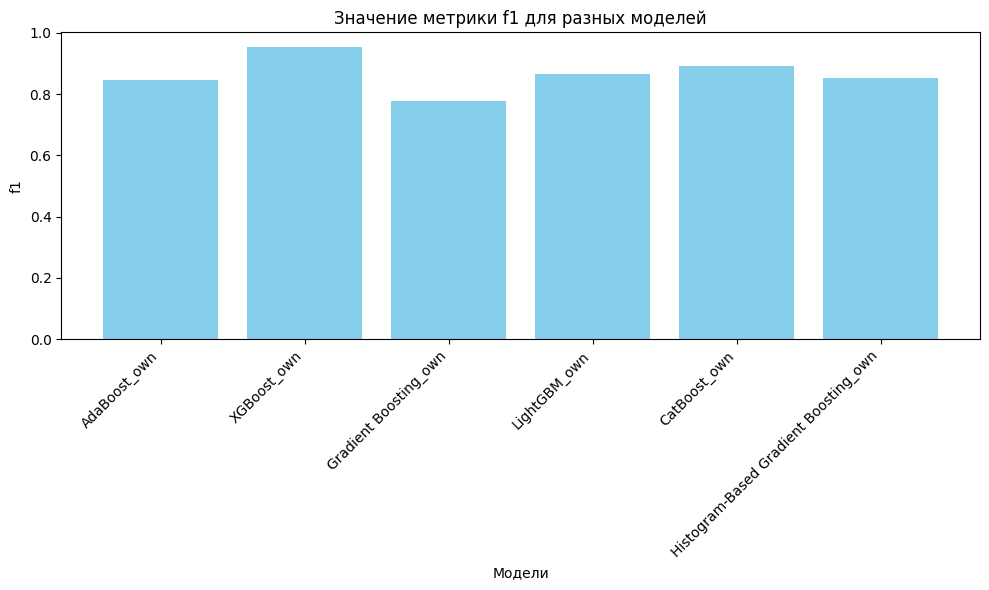

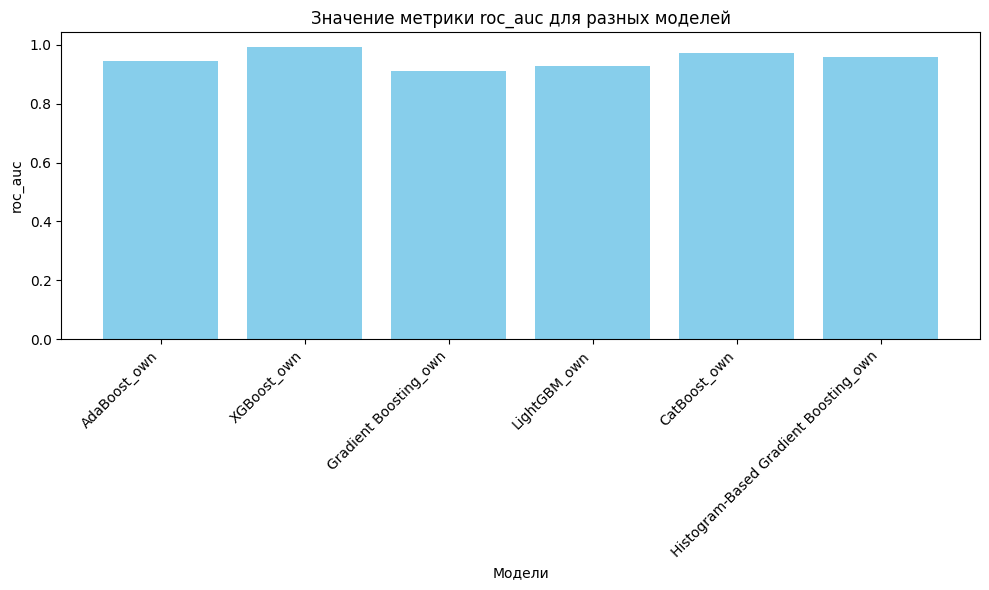

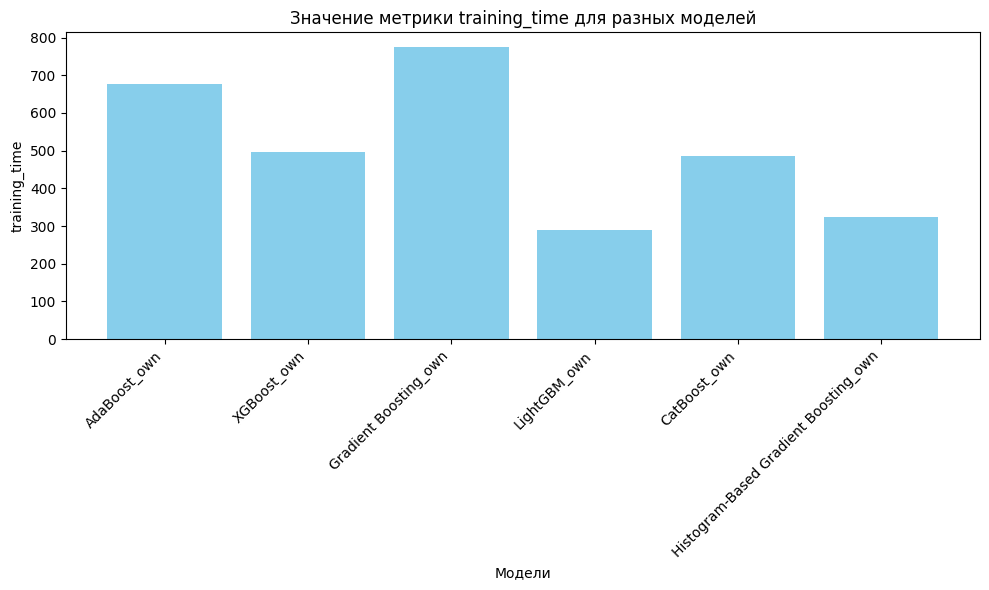

In [76]:
def plot_metric(results, metric_name):
    model_names = list(results.keys())
    metric_values = [result[metric_name] for result in results.values()]

    plt.figure(figsize=(10, 6))
    plt.bar(model_names, metric_values, color='skyblue')
    plt.xlabel('Модели')
    plt.ylabel(metric_name)
    plt.title(f'Значение метрики {metric_name} для разных моделей')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc', 'training_time']
for metric in metrics:
    plot_metric(results, metric)

In [77]:
results_tuples = []

for model_name, metrics in results.items():
    results_tuples.append((model_name, metrics['accuracy'], metrics['precision'], metrics['recall'], metrics['f1'], metrics['roc_auc'], metrics['training_time']))

results_df = pd.DataFrame(results_tuples, columns=['Model',  'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC', 'Training Time'])

results_df

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC,Training Time
0,AdaBoost_own,0.845241,0.849246,0.845241,0.846361,0.946082,677.002851
1,XGBoost_own,0.953809,0.953936,0.953809,0.953725,0.993304,497.608785
2,Gradient Boosting_own,0.775547,0.778373,0.775547,0.776755,0.909546,775.068054
3,LightGBM_own,0.863803,0.868425,0.863803,0.866893,0.926596,290.371383
4,CatBoost_own,0.890803,0.890654,0.890803,0.890721,0.972971,486.567020
5,Histogram-Based Gradient Boosting_own,0.853276,0.853612,0.853276,0.853418,0.958455,323.720441


По результатам анализа моделей машинного обучения, можно сделать вывод, что модель XGBoost показывает наилучшие результаты по всем метрикам, хотя и другие модели также показывают хорошие результаты.

Gradient Boosting показал более низкие показатели по сравнению с остальными моделями.
Значительную часть времени подбора гиперпараметров с использование GridSearchCV ушла на настройку параметров Gradient Boosting.
Это подчеркивает вычислительную сложность данного метода и необходимость тщательной оптимизации параметров для достижения оптимальной производительности из-за его итеративного подхода к обучению.
Модель XGBoost показала лучшие результаты, из-за её способности эффективно работать с большими объемами данных и различными типами признаков.